In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

df = pd.read_parquet("/Users/aiel/Desktop/code/big_data/kaggle-pog-series-s01e01/train.parquet")

# 1. Data Overview

In [2]:
df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,id,duration_seconds,has_thumbnail,target
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,3C66w5Z0ixs_2020-08-12,NaN,True,0.103596
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11 17:00:10+00:00,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare...",M9Pmf9AB4Mo_2020-08-12,NaN,True,0.061611
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11 16:34:06+00:00,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...,J78aPJ3VyNs_2020-08-12,NaN,True,0.173523
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11 16:38:55+00:00,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...,kXLn3HkpjaA_2020-08-12,NaN,True,0.046804
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11 15:10:05+00:00,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...,VIUo6yapDbc_2020-08-12,NaN,True,0.040753


In [3]:
df["video_id"].duplicated().value_counts()
df = df.drop_duplicates(["video_id"])[:]
df = df.reset_index()
df

,index,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,...,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,id,duration_seconds,has_thumbnail,target
0,0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,...,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,3C66w5Z0ixs_2020-08-12,NaN,True,0.103596
1,1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11 17:00:10+00:00,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12,Apex Legends|Apex Legends characters|new Apex ...,2381688,...,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare...",M9Pmf9AB4Mo_2020-08-12,NaN,True,0.061611
2,2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11 16:34:06+00:00,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,...,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...,J78aPJ3VyNs_2020-08-12,NaN,True,0.173523
3,3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11 16:38:55+00:00,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,...,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...,kXLn3HkpjaA_2020-08-12,NaN,True,0.046804
4,4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11 15:10:05+00:00,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,...,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...,VIUo6yapDbc_2020-08-12,NaN,True,0.040753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16964,92132,PACbvzj_H4U,"POST FIGHT Kambosos: Teofimo DELUSIONAL, Lopez...",2021-11-28 21:45:35+00:00,UCEVVENPnHv-kcp2PqQuJvHg,SecondsOut,17,2021-11-30,boxing|secondsout|seconds out|combat|sport|spo...,235053,...,150,1785,https://i.ytimg.com/vi/PACbvzj_H4U/default.jpg,False,False,Radio Rahim interviews George Kambosos vs Teof...,PACbvzj_H4U_2021-11-30,1115.0,True,0.022455
16965,92134,aGbRzWIq9Fs,Tom Brady on Comeback Win Over the Colts | Pre...,2021-11-28 23:24:36+00:00,UC0Wwu7r1ybaaR09ANhudTzA,Tampa Bay Buccaneers,17,2021-11-30,Tampa Bay Buccaneers|Bucs|Buccaneers|NFL,100936,...,24,229,https://i.ytimg.com/vi/aGbRzWIq9Fs/default.jpg,False,False,Quarterback Tom Brady spoke to the media follo...,aGbRzWIq9Fs_2021-11-30,305.0,True,0.014197
16966,92143,B5DWe7EWh1Y,Maxwell Celebrates Living Legend Award With Pe...,2021-11-29 03:36:07+00:00,UCcVqCJ_9owb1zM43vqswMNQ,BETNetworks,24,2021-11-30,BET|BET Networks|BET Music|Black Entertainment...,356902,...,123,1979,https://i.ytimg.com/vi/B5DWe7EWh1Y/default.jpg,False,False,Maxwell performed some of his biggest hits whi...,B5DWe7EWh1Y_2021-11-30,654.0,True,0.044847
16967,92154,LgKVsV8593U,Huge Stealth Change in Warzone After 18 Months...,2021-11-29 17:18:32+00:00,UCG0yjoHan7kXjROe0JgvhzQ,JGOD,20,2021-11-30,best rifle mw|best weapons mw|Best rifles mw|b...,169103,...,117,521,https://i.ytimg.com/vi/LgKVsV8593U/default.jpg,False,False,Explaining how they Changed the UAV in Warzone...,LgKVsV8593U_2021-11-30,201.0,True,0.034399


In [4]:
df.describe()

,index,categoryId,view_count,likes,dislikes,comment_count,duration_seconds,target
count,16969.000000,16969.000000,1.696900e+04,1.696900e+04,16969.000000,1.696900e+04,16530.000000,16969.000000
mean,46780.300371,18.763215,1.329921e+06,9.631118e+04,1507.134657,9.141133e+03,734.765336,0.068937
std,27744.674607,6.780169,2.739764e+06,2.513194e+05,5719.610494,5.552555e+04,4921.824154,0.050844
min,0.000000,1.000000,3.851000e+04,0.000000e+00,0.000000,0.000000e+00,3.000000,0.000000
25%,21607.000000,17.000000,3.302460e+05,1.500100e+04,235.000000,1.250000e+03,179.000000,0.031127
50%,48383.000000,20.000000,6.366230e+05,3.460700e+04,512.000000,2.785000e+03,430.000000,0.061052
75%,71289.000000,24.000000,1.355043e+06,8.527800e+04,1275.000000,6.550000e+03,843.000000,0.091314
max,92165.000000,29.000000,8.589037e+07,7.110071e+06,405329.000000,3.400291e+06,485620.000000,0.433503


In [5]:
df.dtypes

index                              int64
video_id                          object
title                             object
publishedAt          datetime64[ns, UTC]
channelId                         object
channelTitle                      object
categoryId                         int64
trending_date             datetime64[ns]
tags                              object
view_count                         int64
likes                              int64
dislikes                           int64
comment_count                      int64
thumbnail_link                    object
comments_disabled                   bool
ratings_disabled                    bool
description                       object
id                                object
duration_seconds                 float64
has_thumbnail                       bool
target                           float64
dtype: object

In [6]:
df.isna().sum() / len(df)

index                0.000000
video_id             0.000000
title                0.000000
publishedAt          0.000000
channelId            0.000000
channelTitle         0.000000
categoryId           0.000000
trending_date        0.000000
tags                 0.000000
view_count           0.000000
likes                0.000000
dislikes             0.000000
comment_count        0.000000
thumbnail_link       0.000000
comments_disabled    0.000000
ratings_disabled     0.000000
description          0.018622
id                   0.000000
duration_seconds     0.025871
has_thumbnail        0.000000
target               0.000000
dtype: float64

description과 duration_seconds에 null value 존재  
전체 데이터의 1~2% 수준이라 제거

In [7]:
df = df.dropna()
df.isna().sum() / len(df)

index                0.0
video_id             0.0
title                0.0
publishedAt          0.0
channelId            0.0
channelTitle         0.0
categoryId           0.0
trending_date        0.0
tags                 0.0
view_count           0.0
likes                0.0
dislikes             0.0
comment_count        0.0
thumbnail_link       0.0
comments_disabled    0.0
ratings_disabled     0.0
description          0.0
id                   0.0
duration_seconds     0.0
has_thumbnail        0.0
target               0.0
dtype: float64

# 1. Numberic

In [8]:
train_df = df.sample(frac=0.8,random_state=200)
test_df = df.drop(train_df.index)

train_df = train_df.reset_index()
test_df = test_df.reset_index()

df = None

train_df.head()

,level_0,index,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,...,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,id,duration_seconds,has_thumbnail,target
0,10711,60554,ZLbt0gPi5b0,Ariel Helwani’s next chapter(s). Here’s where ...,2021-06-21 14:00:29+00:00,UCVOdVp54jLrFhRUm4S29HeA,Ariel Helwani,17,2021-06-23,ariel helwani|mma|the mma hour|the mixed marti...,...,124,929,https://i.ytimg.com/vi/ZLbt0gPi5b0/default.jpg,False,False,Thank you for the support. I am extremely exci...,ZLbt0gPi5b0_2021-06-23,1332.0,True,0.056121
1,15670,86082,FUoqAn5T4h4,L’Accord - Chamber Agent Trailer // VALORANT,2021-10-29 15:00:08+00:00,UC8CX0LD98EDXl4UYX1MDCXg,VALORANT,20,2021-10-30,Chamber|New Agent|VALORANT Episode 3|Episode I...,...,443,6913,https://i.ytimg.com/vi/FUoqAn5T4h4/default.jpg,False,False,Questions answered. Futures revealed. Bienvenu...,FUoqAn5T4h4_2021-10-30,97.0,True,0.060390
2,7146,39812,cmMcOyg6rU0,No But...Did Gucci Beauty Finesse Me?! Their N...,2021-03-04 01:36:20+00:00,UCzJIliq68IHSn-Kwgjeg2AQ,Jackie Aina,26,2021-03-05,gucci beauty|gucci foundation|gucci beauty fou...,...,122,806,https://i.ytimg.com/vi/cmMcOyg6rU0/default.jpg,False,False,Hi guys! welcome back. Today I'll be experimen...,cmMcOyg6rU0_2021-03-05,1166.0,True,0.088190
3,9173,52790,lrAmpErQDlA,Among Us Logic: The Curse of Novisor (Cartoon ...,2021-05-08 17:00:31+00:00,UCToxKVrkEuAONR4rFIJ_DyQ,GameToons,1,2021-05-09,among us|among us logic|animation|funny animat...,...,809,8305,https://i.ytimg.com/vi/lrAmpErQDlA/default.jpg,False,False,► SUBSCRIBE to GameTunes! -https://www.youtube...,lrAmpErQDlA_2021-05-09,616.0,True,0.047602
4,12772,71495,JssFDDJ_E2g,Best way to make money in GTA 5 #shorts,2021-08-16 06:35:34+00:00,UCSQj0OHaSHAxSsTt8bpmSUw,eyszo,20,2021-08-18,[None],...,1659,372,https://i.ytimg.com/vi/JssFDDJ_E2g/default.jpg,False,False,#shorts #gta5​ #gta5funny​ #gta5funnymoments​ ...,JssFDDJ_E2g_2021-08-18,13.0,False,0.037915


In [9]:
model = RandomForestRegressor(max_depth=2, random_state=0)
model.fit(train_df[["likes", "dislikes", "comment_count"]], train_df[["view_count"]].values.ravel())

preds = model.predict(train_df[["likes", "dislikes", "comment_count"]])
org_train_score = mean_squared_error(train_df[["view_count"]], preds + 1)
print(f'Train MSE Loss:{org_train_score}')

preds = model.predict(test_df[["likes", "dislikes", "comment_count"]])
org_test_score = mean_squared_error(test_df[["view_count"]], preds + 1)
print(f'Test MSE Loss:{org_test_score}')

Train MSE Loss:2604344744754.3926
Test MSE Loss:2652016202124.9946


전처리 없이 예측시 낮은 성능을 나타낸다.

## 2. Numeric Data

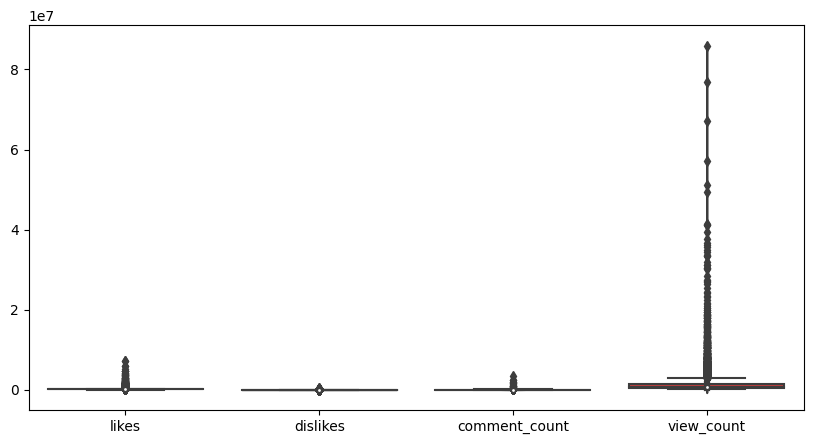

In [10]:
titles = ["likes", "dislikes", "comment_count", "view_count"]

plt.figure(figsize=(10, 5))

sns.violinplot(data=train_df[titles])
sns.boxplot(data=train_df[titles])
plt.show()

right skewed distribution으로 예측하기 힘든 데이터.  
정규화를 위해 log를 취해보자

$$ new\_data = log(data) $$

In [11]:
eps = 1
train_df[titles] = np.log(train_df[titles] + eps)

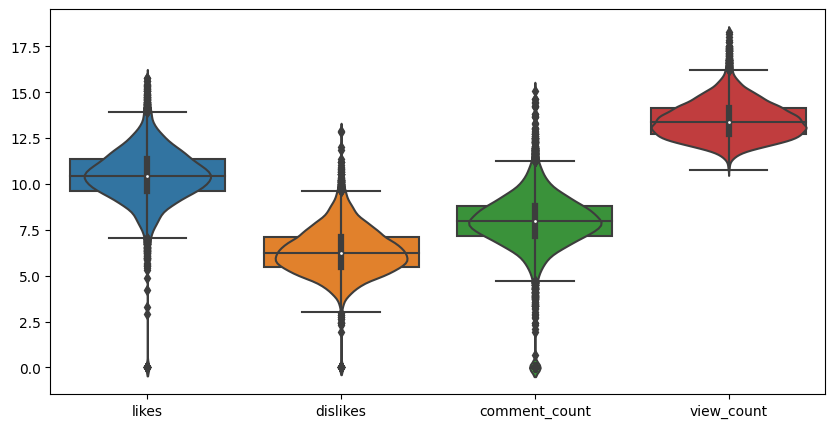

In [12]:
plt.figure(figsize=(10, 5))

sns.violinplot(data=train_df[titles])
sns.boxplot(data=train_df[titles])
plt.show()

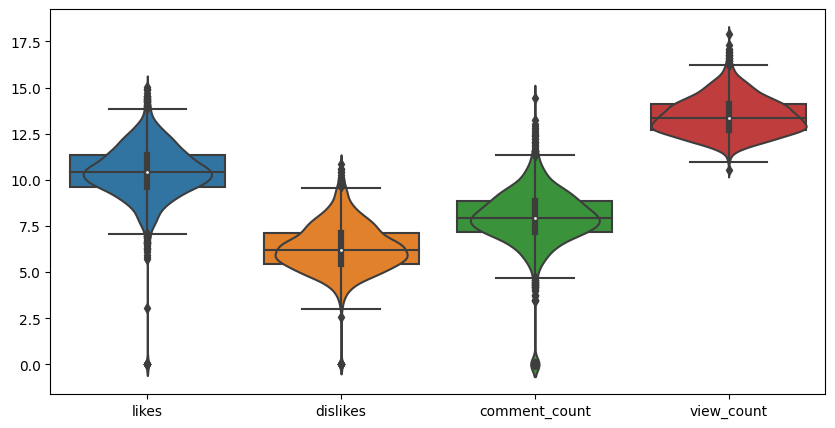

In [13]:
plt.figure(figsize=(10, 5))

sns.violinplot(data=np.log(test_df[titles] + eps))
sns.boxplot(data=np.log(test_df[titles] + eps))
plt.show()

In [14]:
def split_outlier(df, fator=1.5):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    outlier_index = ((df < (Q1 - fator * IQR)) |(df > (Q3 + fator * IQR))).any(axis=1)
    return df[~outlier_index], df[outlier_index]

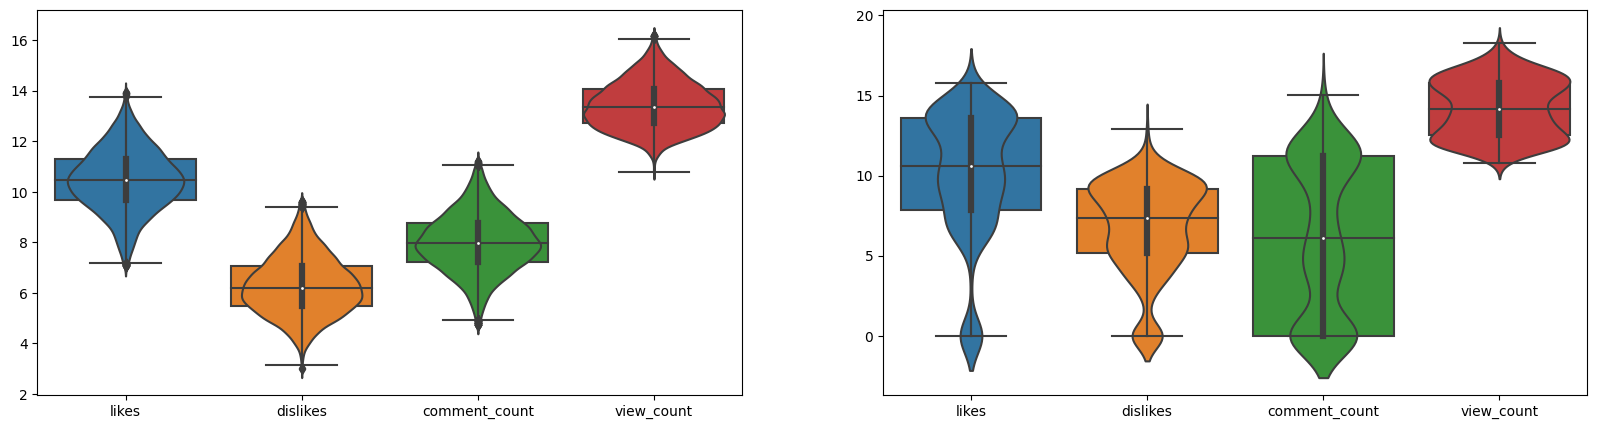

In [15]:
plt.figure(figsize=(20, 5))

outlier = train_df.copy()
train_df[titles], outlier[titles] = split_outlier(train_df[titles], 1.5)
train_df = train_df.dropna()
outlier = outlier.dropna()

# train_df["likes/dislikes"] = train_df["likes"] / train_df["dislikes"]
# outlier["likes/dislikes"] = outlier["likes"] / outlier["dislikes"]

# titles += ["likes/dislikes"]

plt.subplot(121)
sns.violinplot(data=train_df[titles])
sns.boxplot(data=train_df[titles])

plt.subplot(122)
sns.violinplot(data=outlier[titles])
sns.boxplot(data=outlier[titles])
plt.show()

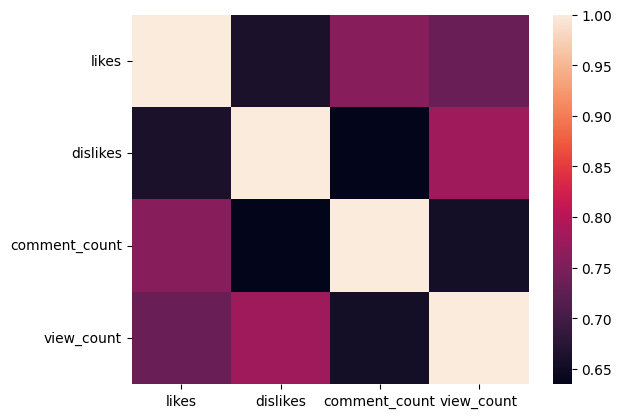

In [16]:
sns.heatmap(train_df[titles].corr())
plt.show()

In [17]:
train_df[titles].corr()

,likes,dislikes,comment_count,view_count
likes,1.000000,0.660848,0.759031,0.733827
dislikes,0.660848,1.000000,0.634855,0.777934
comment_count,0.759031,0.634855,1.000000,0.654685
view_count,0.733827,0.777934,0.654685,1.000000


In [18]:
model = RandomForestRegressor(max_depth=2, random_state=0)
model.fit(train_df[["likes", "dislikes", "comment_count"]], train_df[["view_count"]].values.ravel())

preds = model.predict(train_df[["likes", "dislikes", "comment_count"]])
log_train_score = mean_squared_error(np.exp(train_df[["view_count"]]) - eps, np.exp(preds) - eps)
print(f'Train MSE Loss:{log_train_score}')

preds = model.predict(np.log(test_df[["likes", "dislikes", "comment_count"]] + eps))
log_test_score = mean_squared_error(test_df[["view_count"]], np.exp(preds) - eps)
print(f'Test MSE Loss:{log_test_score}')

Train MSE Loss:771082973656.2701
Test MSE Loss:4000128585159.1685


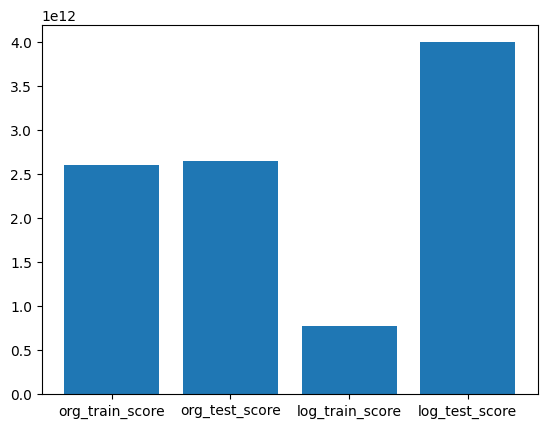

In [19]:
x = np.arange(4)
y = [org_train_score, org_test_score, log_train_score, log_test_score]
xticks = ["org_train_score", "org_test_score", "log_train_score", "log_test_score"]

plt.bar(x, y)
plt.xticks(x, xticks)

plt.show()

## 3. Boolean data of numeric outlier

In [20]:
def plot_bool_column(df):
    plt.figure(figsize=(10, 5))
    plt.subplot(121)
    df["comments_disabled"].value_counts().plot.bar()

    plt.title("Comment Disabled")

    plt.subplot(122)
    df["ratings_disabled"].value_counts().plot.bar()

    plt.title("Rating Disabled")
    plt.show()

In [21]:
def print_bool_cross_correlation(df):
    comments_false_df = pd.DataFrame(df[df["comments_disabled"] == False]["view_count"].values)
    comments_true_df = pd.DataFrame(df[df["comments_disabled"] == True]["view_count"].values)

    rating_false_df = pd.DataFrame(df[df["ratings_disabled"] == False]["view_count"].values)
    rating_true_df = pd.DataFrame(df[df["ratings_disabled"] == True]["view_count"].values)

    print(f"Cross correlation of view count between True and False - Comment: {comments_false_df.corrwith(comments_true_df).values[0]}, Rating: {rating_false_df.corrwith(rating_true_df).values[0]}")

In [22]:
temp = pd.read_parquet("/Users/aiel/Desktop/code/big_data/kaggle-pog-series-s01e01/train.parquet")
print_bool_cross_correlation(temp)

Cross correlation of view count between True and False - Comment: 0.02168921091303098, Rating: -0.01893641686901178


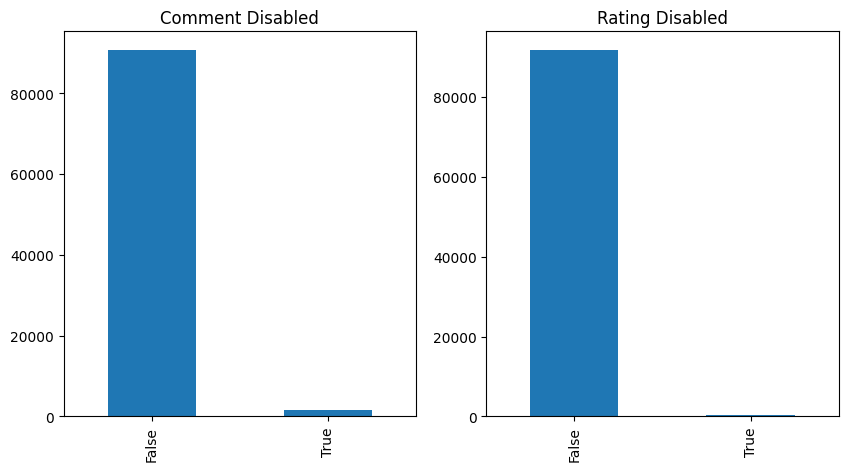

In [23]:
plot_bool_column(temp)

원본데이터는 True와 False 별 관련이 없음

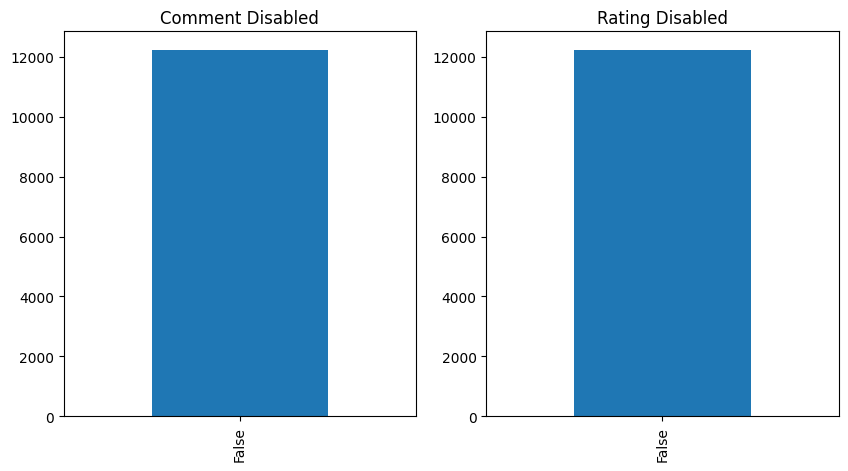

In [24]:
plot_bool_column(train_df)

numeric data의 이상치에 True가 모두 들어있음

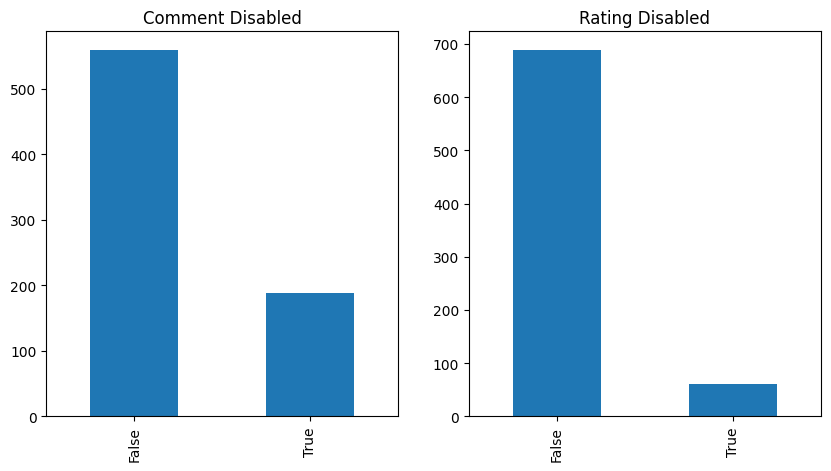

In [25]:
plot_bool_column(outlier)

outlier와 disable true관에 상관관계가 존재할 것이라 추정

In [26]:
print_bool_cross_correlation(train_df)

Cross correlation of view count between True and False - Comment: nan, Rating: nan


In [27]:
print_bool_cross_correlation(outlier)

Cross correlation of view count between True and False - Comment: -0.007086531738740363, Rating: 0.1338145717043885


/var/folders/5x/5vg15xqj205c_t67bgrh20m00000gn/T/ipykernel_40745/2154716315.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


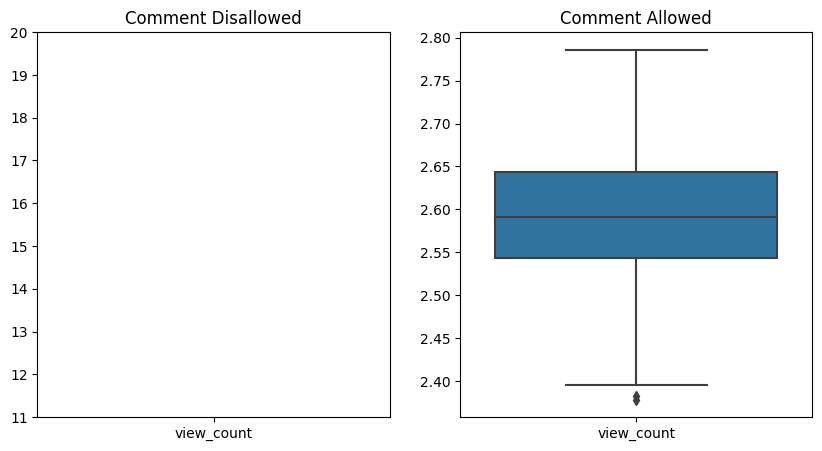

In [28]:
df = pd.read_parquet("/Users/aiel/Desktop/code/big_data/kaggle-pog-series-s01e01/train.parquet")

plt.figure(figsize=(10, 5))
plt.ylim([11, 20])
plt.subplot(121)
sns.boxplot(np.log(train_df[train_df["comments_disabled"] == True][["view_count"]]))
plt.title("Comment Disallowed")

plt.ylim([11, 20])
plt.subplot(122)
sns.boxplot(np.log(train_df[train_df["comments_disabled"] == False][["view_count"]]))
plt.title("Comment Allowed")

plt.show()

/var/folders/5x/5vg15xqj205c_t67bgrh20m00000gn/T/ipykernel_40745/3021999338.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


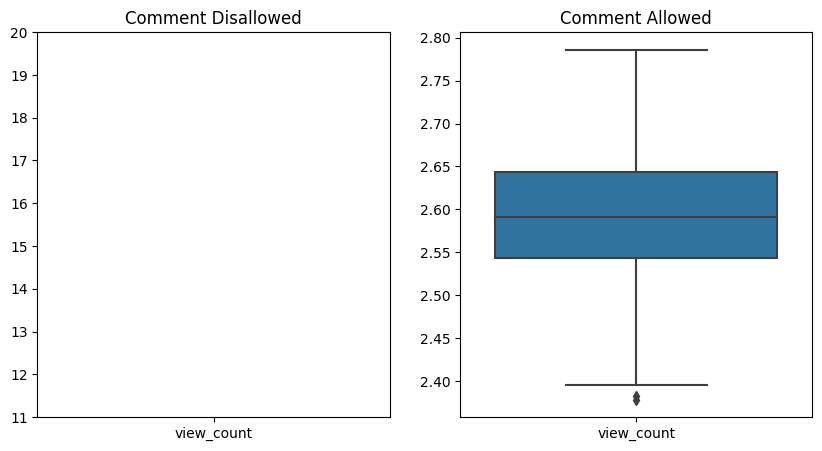

In [29]:
plt.figure(figsize=(10, 5))

plt.ylim([11, 20])
plt.subplot(121)
sns.boxplot(np.log(train_df[train_df["ratings_disabled"] == True][["view_count"]]))
plt.title("Comment Disallowed")

plt.ylim([11, 20])
plt.subplot(122)
sns.boxplot(np.log(train_df[train_df["ratings_disabled"] == False][["view_count"]]))
plt.title("Comment Allowed")

plt.show()

In [30]:
df[["publishedAt", "trending_date"]]

,publishedAt,trending_date
0,2020-08-11 19:20:14+00:00,2020-08-12
1,2020-08-11 17:00:10+00:00,2020-08-12
2,2020-08-11 16:34:06+00:00,2020-08-12
3,2020-08-11 16:38:55+00:00,2020-08-12
4,2020-08-11 15:10:05+00:00,2020-08-12
...,...,...
92270,2021-11-23 19:13:46+00:00,2021-11-30
92271,2021-11-24 23:48:37+00:00,2021-11-30
92272,2021-11-23 22:50:19+00:00,2021-11-30
92273,2021-11-21 21:15:16+00:00,2021-11-30


In [31]:
train_df["trand_duration"] = train_df["trending_date"].dt.tz_localize(None) - df["publishedAt"].dt.tz_localize(None)
train_df["trand_duration"] = train_df["trand_duration"].dt.days
train_df["trand_duration"]

0        315
1        444
2        205
3        270
4        371
        ... 
12976    117
12977    234
12978     98
12979    266
12980    -12
Name: trand_duration, Length: 12232, dtype: int64

In [32]:
df["channelTitle"].value_counts()

NFL                       612
NBA                       564
SSSniperWolf              480
MrBeast Gaming            380
SSundee                   360
                         ... 
NEEDTOBREATHE               1
Eddie 'The Beast' Hall      1
Galantis                    1
Roadshow                    1
WickedBinge                 1
Name: channelTitle, Length: 4632, dtype: int64

In [33]:
num_channels = len(train_df["channelTitle"].value_counts())
df_len = len(train_df)

f"num channels: {num_channels}, df length: {df_len}" 

'num channels: 3748, df length: 12232'

In [34]:
len(train_df[train_df["has_thumbnail"] == True])

10919

In [35]:
df = pd.read_parquet("/Users/aiel/Desktop/code/big_data/kaggle-pog-series-s01e01/train.parquet")
df["video_id"].duplicated().value_counts()

True     75306
False    16969
Name: video_id, dtype: int64

In [36]:
df[df["video_id"] == df["video_id"][0]]

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,id,duration_seconds,has_thumbnail,target
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,3C66w5Z0ixs_2020-08-12,NaN,True,0.103596
202,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-13,brawadis|prank|basketball|skits|ghost|funny vi...,3017834,183592,9506,41374,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,3C66w5Z0ixs_2020-08-13,NaN,True,0.060836
431,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-14,brawadis|prank|basketball|skits|ghost|funny vi...,3721729,195344,10648,44555,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,3C66w5Z0ixs_2020-08-14,NaN,True,0.052487
646,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-15,brawadis|prank|basketball|skits|ghost|funny vi...,3853404,200215,10904,45461,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,3C66w5Z0ixs_2020-08-15,NaN,True,0.051958
895,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-16,brawadis|prank|basketball|skits|ghost|funny vi...,3898795,201808,10975,45574,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,3C66w5Z0ixs_2020-08-16,NaN,True,0.051762
1149,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-17,brawadis|prank|basketball|skits|ghost|funny vi...,3929527,203054,11026,45488,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,3C66w5Z0ixs_2020-08-17,NaN,True,0.051674
1392,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-18,brawadis|prank|basketball|skits|ghost|funny vi...,3958226,204260,11070,45134,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,3C66w5Z0ixs_2020-08-18,NaN,True,0.051604


In [37]:
df = df.drop_duplicates(["video_id"])[:]
df["video_id"].duplicated().value_counts()

False    16969
Name: video_id, dtype: int64